#Clustering Assignment

## Q1. What is the difference between K-Means and Hierarchical Clustering?  
Provide a use case for each.

**Answer:**  
K-Means clustering partitions the data into a fixed number of clusters by minimizing the distance between data points and their cluster centers. It is computationally efficient and suitable for large datasets, but it requires knowing the number of clusters beforehand.

Hierarchical clustering builds a tree-like structure by merging or splitting clusters based on similarity. It does not require the number of clusters in advance and is useful for datasets where relationships between clusters need to be understood.

## Q2. Explain the purpose of the Silhouette Score in evaluating clustering algorithms.

**Answer:**  
The **Silhouette Score** is a metric used to evaluate the quality of clustering results. It measures how well each data point fits within its assigned cluster compared to other clusters.

- A **higher Silhouette Score** (closer to +1) means that the data point is well matched to its own cluster and far from neighboring clusters.  
- A **score near 0** indicates that the data point is on or near the boundary between clusters.  
- A **negative score** suggests that the data point may have been assigned to the wrong cluster.

The Silhouette Score helps to:  
1. Assess the compactness and separation of clusters.  
2. Compare different clustering algorithms or parameter settings (like the number of clusters).  
3. Choose the optimal number of clusters by selecting the configuration with the highest average Silhouette Score.

Overall, it provides an intuitive and quantitative way to judge how meaningful the clustering results are.

## Q3. What are the core parameters of DBSCAN, and how do they influence the clustering process?

**Answer:**  
The core parameters of **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** are:

1. **`eps` (epsilon):**  
   - It defines the maximum distance between two points for them to be considered neighbors.  
   - A smaller `eps` results in tighter clusters, while a larger `eps` may merge distinct clusters or include more noise points.

2. **`min_samples`:**  
   - It specifies the minimum number of points required to form a dense region or cluster.  
   - A higher `min_samples` value makes the algorithm stricter, resulting in fewer, larger clusters and more points labeled as noise.  
   - A lower value allows smaller clusters but may capture noise as part of clusters.

**How they influence the clustering process:**  
- Together, `eps` and `min_samples` control how clusters are formed based on density.  
- Proper tuning ensures that dense regions are grouped as clusters, while sparse regions are treated as noise.  
- If parameters are not chosen well, DBSCAN may fail to identify meaningful clusters or overfit by including noise.

These parameters allow DBSCAN to effectively discover clusters of arbitrary shape and handle outliers without requiring the number of clusters in advance.

## Q4. Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?

**Answer:**  
Feature scaling is important in clustering algorithms because these algorithms rely on distance measurements (like Euclidean distance) to group similar data points together. If features are not scaled properly, some features with larger numerical ranges may dominate the distance calculations, leading to biased or incorrect clustering results.

For example:  
- In **K-Means**, the algorithm assigns data points to clusters based on the shortest distance to cluster centers. If one feature has a much larger scale, it will disproportionately affect the distance, making clusters less meaningful.  
- In **DBSCAN**, density-based clustering also depends on distances between points. Without scaling, features with larger magnitudes can distort the neighborhood structure, resulting in incorrect identification of dense regions.

By applying feature scaling (such as standardization or normalization), all features contribute equally to distance calculations, ensuring that clustering reflects the true structure of the data rather than the magnitude of individual features.

## Q5. What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?

**Answer:**  
The **Elbow Method** is a technique used to determine the optimal number of clusters in K-Means clustering. It involves running the K-Means algorithm for a range of cluster numbers (k) and calculating the **within-cluster sum of squares (WCSS)** for each k.

- **WCSS** measures how compact the clusters are by calculating the total squared distance between each data point and its cluster center.  
- As the number of clusters increases, the WCSS decreases because more clusters reduce the distance within each group.

The **Elbow Point** is the value of k where the rate of decrease in WCSS slows down significantly, forming a shape similar to an “elbow” on the plot. This point indicates that adding more clusters beyond it yields diminishing returns in terms of clustering quality.

By identifying the elbow point, you can choose a cluster count that balances model complexity and performance, helping to avoid both underfitting (too few clusters) and overfitting (too many clusters).

## Q6. Generate synthetic data using `make_blobs(n_samples=300, centers=4)`, apply KMeans clustering, and visualize the results with cluster centers.

**Dataset:**  
For this question, we are using the `make_blobs` function from `sklearn.datasets` to generate synthetic data.  
- `n_samples=300`: The dataset will have 300 data points.  
- `centers=4`: The data will be grouped around 4 cluster centers.  
- `random_state=42`: Used for reproducibility so that the results are consistent each time the code is run.

**Answer:**


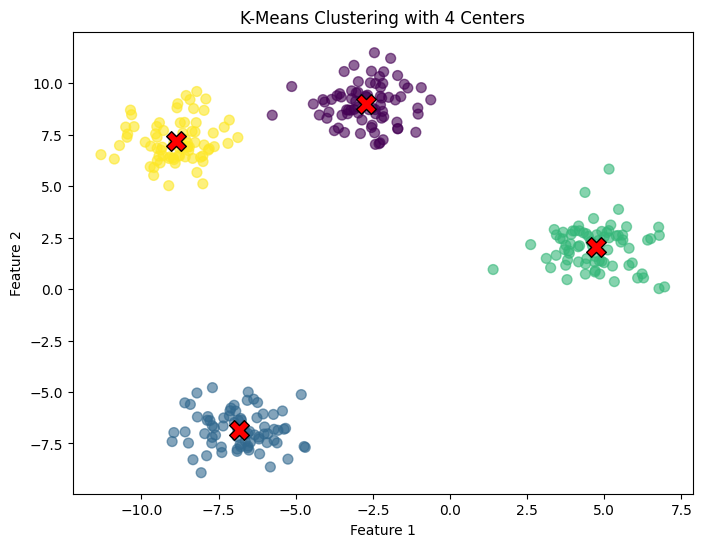

In [1]:
# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Visualize the clusters and their centers
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', edgecolors='black')
plt.title("K-Means Clustering with 4 Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Q7. Load the Wine dataset, apply StandardScaler, and then train a DBSCAN model. Print the number of clusters found (excluding noise).

**Answer:**

In [2]:
# Import required libraries
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load the Wine dataset
data = load_wine()
X = data.data

# Apply StandardScaler to normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the DBSCAN model
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan.fit(X_scaled)

# Get the cluster labels and count the number of clusters excluding noise (-1)
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(f"Number of clusters found (excluding noise): {n_clusters}")


Number of clusters found (excluding noise): 0


## Q8. Generate moon-shaped synthetic data using `make_moons(n_samples=200, noise=0.1)`, apply DBSCAN, and highlight the outliers in the plot.

**Answer:**

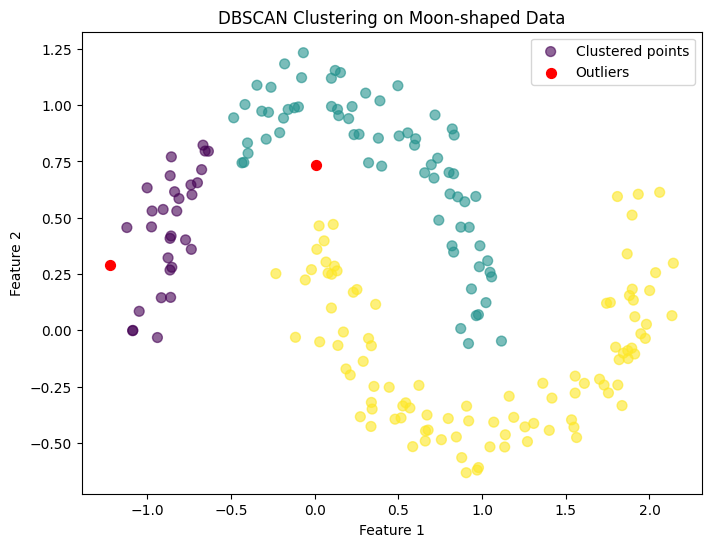

In [3]:
# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate moon-shaped synthetic data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)
labels = dbscan.labels_

# Identify outliers (points labeled -1)
outliers = labels == -1

# Plot the clusters and highlight outliers
plt.figure(figsize=(8,6))
plt.scatter(X[~outliers, 0], X[~outliers, 1], c=labels[~outliers], cmap='viridis', s=50, alpha=0.6, label='Clustered points')
plt.scatter(X[outliers, 0], X[outliers, 1], c='red', s=50, label='Outliers')
plt.title("DBSCAN Clustering on Moon-shaped Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


## Q9. Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.

**Answer:**

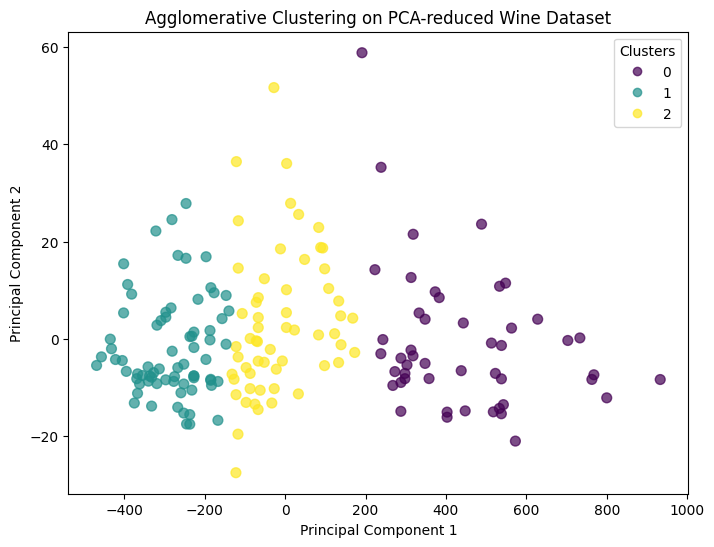

In [4]:
# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Load the Wine dataset
data = load_wine()
X = data.data

# Reduce to 2D using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Apply Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
labels = agg_cluster.fit_predict(X_pca)

# Visualize the result in 2D
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.title("Agglomerative Clustering on PCA-reduced Wine Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()


## Q10. You are working as a data analyst at an e-commerce company. The marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product purchase history across categories.

Describe your real-world data science workflow using clustering:
- Which clustering algorithm(s) would you use and why?
- How would you preprocess the data (missing values, scaling)?
- How would you determine the number of clusters?
- How would the marketing team benefit from your clustering analysis?

**Answer:**

**Which clustering algorithm(s) would you use and why:**  
I would start with **K-Means clustering** because it is efficient and suitable for datasets where customer groups form relatively spherical clusters. It is easy to interpret and implement. However, if the data contains noise or irregularly shaped clusters, I would explore **DBSCAN** or **Agglomerative Clustering** since they are better at detecting clusters of varying shapes and densities.

**How would you preprocess the data (missing values, scaling):**

- **Missing values:** I would handle missing data by analyzing its distribution. For numerical features, missing values could be replaced using statistical methods like mean or median imputation, or through predictive modeling. For categorical features, missing values could be filled with the most frequent category or treated as a separate group.  

- **Scaling:** As features like age, income, or purchase frequency can have different ranges, I would apply scaling techniques like **StandardScaler** or **MinMaxScaler**. This ensures that all features equally influence the clustering process and avoids bias due to scale differences.

**How would you determine the number of clusters:**  
I would use the **Elbow Method** to plot the within-cluster sum of squares (WCSS) for different numbers of clusters and look for the point where adding more clusters yields diminishing returns. I would also calculate the **Silhouette Score** to measure how well-separated the clusters are. Additionally, I would visualize the data using **PCA** or **t-SNE** to identify potential groupings and consult with business stakeholders to ensure that the chosen number of clusters aligns with practical marketing strategies.

**How would the marketing team benefit from your clustering analysis:**  
The clustering results would enable the marketing team to tailor campaigns for specific customer segments. For example, high-spending customers could be offered exclusive rewards, while price-sensitive customers could receive discount offers. This targeted approach would improve customer satisfaction, boost conversion rates, and optimize marketing spend by focusing on the needs and behaviors of distinct customer groups.
  
**Python Implementation:**  
The following code demonstrates how to segment customers using K-Means clustering after preprocessing and scaling the data.


/tmp/ipython-input-2033205992.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Spending_Score'].fillna(df['Spending_Score'].median(), inplace=True)


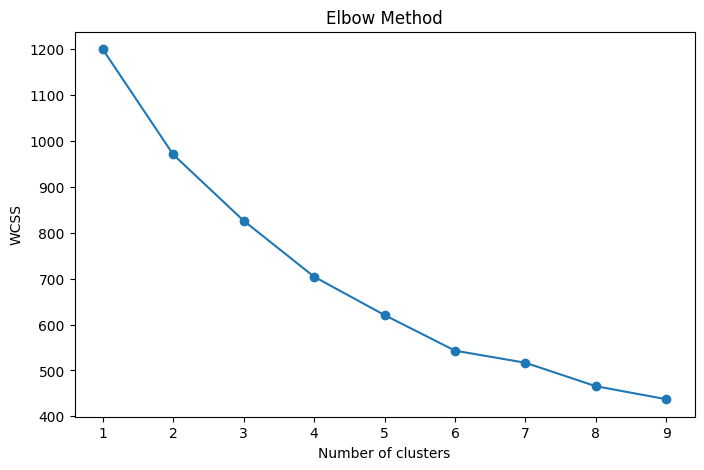

Silhouette Score: 0.19


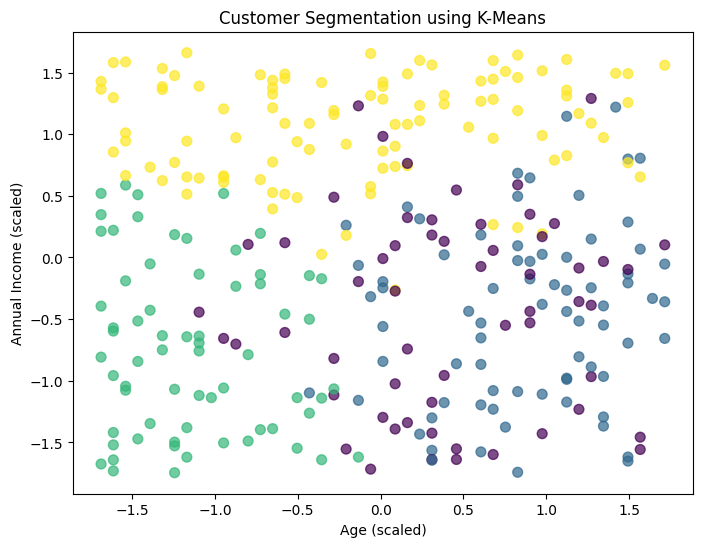

In [5]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create a synthetic dataset (for demonstration purposes)
np.random.seed(42)
n_customers = 300
data = {
    'Age': np.random.randint(18, 65, size=n_customers),
    'Annual_Income': np.random.randint(20000, 120000, size=n_customers),
    'Purchase_Frequency': np.random.randint(1, 50, size=n_customers),
    'Spending_Score': np.random.randint(1, 100, size=n_customers)
}
df = pd.DataFrame(data)

# Handle missing values (for demonstration, introduce some missing data)
df.loc[5:10, 'Spending_Score'] = np.nan
df['Spending_Score'].fillna(df['Spending_Score'].median(), inplace=True)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Use the Elbow Method to find the optimal number of clusters
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8,5))
plt.plot(range(1, 10), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Choose an optimal number of clusters (e.g., k=4 based on the elbow plot)
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Evaluate clustering with silhouette score
score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {score:.2f}")

# Visualize the clusters (using first two features for simplicity)
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.title('Customer Segmentation using K-Means')
plt.xlabel('Age (scaled)')
plt.ylabel('Annual Income (scaled)')
plt.show()
